In [10]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units

In [2]:
plt.style.use("dark_background")
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")

# Height Data

We're going to make our own height data. Let's assume we have a Gaussian distribution:

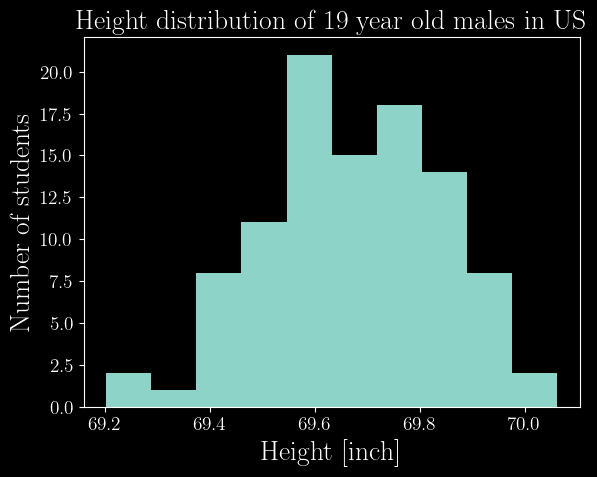

In [21]:
rng = np.random.default_rng()
rvs = rng.normal(loc=176.94, scale=0.44, size=(100,))
rvs *= units.cm
units.imperial.enable()


fig = plt.figure()
ax = plt.gca()
ax.hist(rvs.to("inch").value, bins=10)
ax.set_xlabel("Height [inch]", fontsize=20)
ax.set_ylabel("Number of students", fontsize=20)
ax.set_title("Height distribution of 19 year old males in US", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
fig.savefig("heights.pdf", transparent=True, bbox_inches="tight")

In [24]:
print(rvs)

[177.21196175 177.64926354 176.02039241 177.12426377 176.53504186
 176.59637538 177.00592948 177.33905191 177.27986263 177.32462509
 177.05825577 177.02225894 177.71818449 176.71454028 177.26419632
 177.45941807 176.26417182 176.9401041  176.74098866 176.75605325
 176.98446294 177.40880559 177.41238174 177.33854531 176.70021754
 177.7816481  176.79246619 177.16577177 176.76216668 176.29284597
 177.5788307  177.40550474 176.64863735 177.2763009  177.26258959
 177.13529169 177.1520403  176.77223362 177.40716803 177.27196461
 176.67350517 177.68372142 176.97719968 176.78109005 176.30227588
 177.21513344 177.54397259 176.69920195 177.07709395 177.01715051
 177.45694375 176.35880321 176.64035313 176.60160695 176.50578367
 177.95740975 176.33877153 176.68659189 177.3473835  176.66421374
 176.54857948 175.81744963 177.33987709 177.23796836 176.29797554
 176.63324762 176.9630359  176.51982638 177.3222485  176.6970937
 175.77271027 176.69274373 176.47828255 177.1913306  177.47093704
 177.138393

# Pitch Data

We're going to be using MLB pitch data for these examples. We downloaded the data from [here](https://baseballsavant.mlb.com). For this example, we're using the pitching data from Gerrit Cole for the 2022 season through September.

In [3]:
pitch_data = pd.read_csv("543037_data.csv")

In [81]:
print(pitch_data)

     pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0            FF  2022-09-07           97.2          -1.82           5.80   
1            KC  2022-09-07           81.0          -1.96           5.74   
2            FF  2022-09-07           98.0          -1.88           5.77   
3            FF  2022-09-07           97.4          -1.72           5.77   
4            SL  2022-09-07           88.3          -2.03           5.62   
...         ...         ...            ...            ...            ...   
2779         FF  2022-04-08           99.3          -1.77           5.79   
2780         FF  2022-04-08           98.0          -1.71           5.89   
2781         FF  2022-04-08           98.8          -1.80           5.82   
2782         FC  2022-04-08           92.4          -1.94           5.81   
2783         FF  2022-04-08           97.4          -1.65           5.89   

       player_name  batter  pitcher     events      description  ...  \
0     Cole, Ger

In [4]:
pitch_data["release_speed"]

0       97.2
1       81.0
2       98.0
3       97.4
4       88.3
        ... 
2779    99.3
2780    98.0
2781    98.8
2782    92.4
2783    97.4
Name: release_speed, Length: 2784, dtype: float64

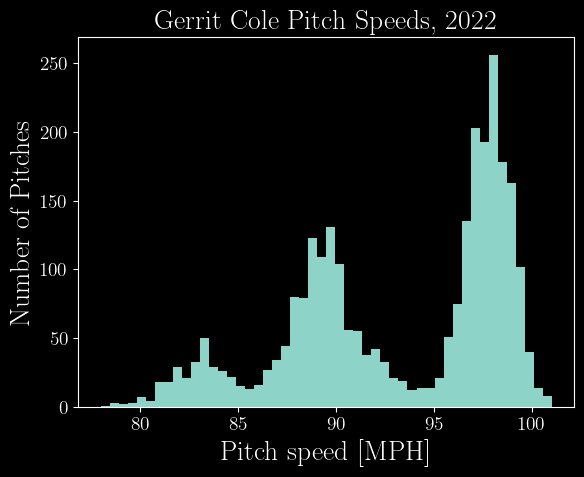

In [95]:
fig = plt.figure()
ax = plt.gca()
ax.hist(pitch_data["release_speed"], bins=50)
ax.set_xlabel("Pitch speed [MPH]", fontsize=20)
ax.set_ylabel("Number of Pitches", fontsize=20)
ax.set_title("Gerrit Cole Pitch Speeds, 2022", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
fig.savefig("all_pitches.pdf", transparent=True, bbox_inches="tight")

In [87]:
df_ff = pitch_data[pitch_data["pitch_type"] == "FF"]
df_sl = pitch_data[pitch_data["pitch_type"] == "SL"]
df_kc = pitch_data[pitch_data["pitch_type"] == "KC"]
df_ch = pitch_data[pitch_data["pitch_type"] == "CH"]

In [88]:
fastball_mph = df_ff["release_speed"]
slider_mph = df_sl["release_speed"]
changeup_mph = df_ch["release_speed"]
curveball_mph = df_kc["release_speed"]

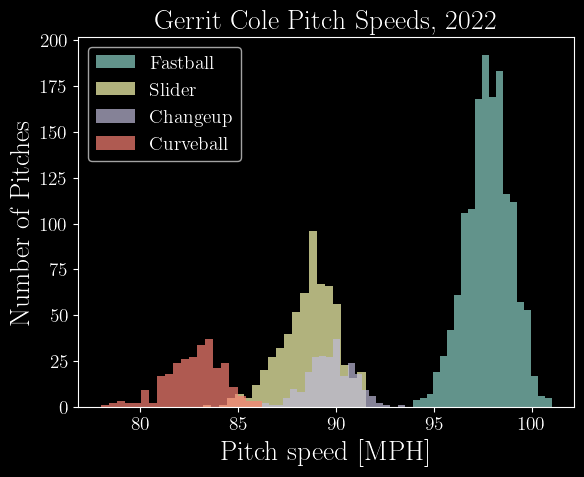

In [96]:
fig = plt.figure()
ax = plt.gca()
ax.hist(fastball_mph, bins=20, label="Fastball", alpha=0.7)
ax.hist(slider_mph, bins=20, label="Slider", alpha=0.7)
ax.hist(changeup_mph, bins=20, label="Changeup", alpha=0.7)
ax.hist(curveball_mph, bins=20, label="Curveball", alpha=0.7)
ax.set_xlabel("Pitch speed [MPH]", fontsize=20)
ax.set_ylabel("Number of Pitches", fontsize=20)
ax.set_title("Gerrit Cole Pitch Speeds, 2022", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
leg = ax.legend(loc=0, prop={"size": 14})
fig.savefig("pitch_type.pdf", transparent=True, bbox_inches="tight")

# Normal Distribution

In [48]:
def pdf(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((x - mu) / sigma)**2 / 2)

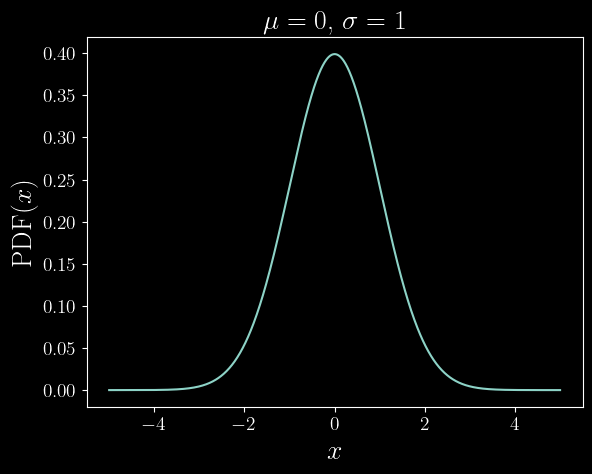

In [49]:
fig = plt.figure()
ax = plt.gca()
xvals = np.linspace(-5, 5, num=1000)
yvals = pdf(xvals, 0, 1)
ax.plot(xvals, yvals)
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("PDF($x$)", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.set_title("$\mu = 0$, $\sigma = 1$", fontsize=20)
fig.savefig("norm.pdf", transparent=True, bbox_inches="tight")

# Monte Carlo Simulation

In [97]:
def roll_dice(n_pts):
    rng = np.random.default_rng()
    rvs = rng.integers(1, 6, size=(n_pts,), endpoint=True)

    return np.sum(rvs)

In [77]:
sums = []
for i in range(10000):
    sums.append(roll_dice(1000))

In [78]:
mu = np.average(sums)
sigma = np.std(sums)

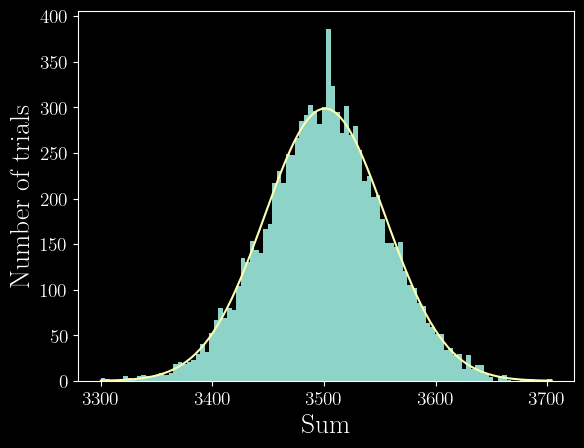

In [80]:
fig = plt.figure()
ax = plt.gca()
hist, bins, _ = ax.hist(sums, bins=100)

p = norm.pdf(bins, mu, sigma)
ax.plot(bins, p / p.sum() * len(sums))

ax.set_xlabel("Sum", fontsize=20)
ax.set_ylabel("Number of trials", fontsize=20)
ax.tick_params(axis="both", labelsize=14)